**Task 2**

For this homework I chose an air pollution forcasting dataset. This dataset reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing China. The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain.

Link to the dataset can be found [here.](https://www.kaggle.com/datasets/rupakroy/lstm-datasets-multivariate-univariate)

Problem: An associated problem to this dataset could be to predoct future PM2.5 levels in a given region based on historical air quality data.

Why Sequence Models?
Air pollution data is inherently time-dependent. Past readings influence future values due to patterns, seasonal changes, and human activity. Traditional machine learning models (like SVM) struggle with capturing long-term temporal dependencies and trends in sequential data.

Sequence models, such as Recurrent Neural Networks are well-suited for this task because of features like temporal dependencies (they retain information about previous time steps, helping capture seasonal fluctuations), sequential input handling (process data sequentially, making them ideal for time-series forecasting), adaptive learning (they can learn long-term dependencies, helping predict trends with even irregular fluctuations.)

RNN Framwork: Tensor Flow (Keras)

**EDA**

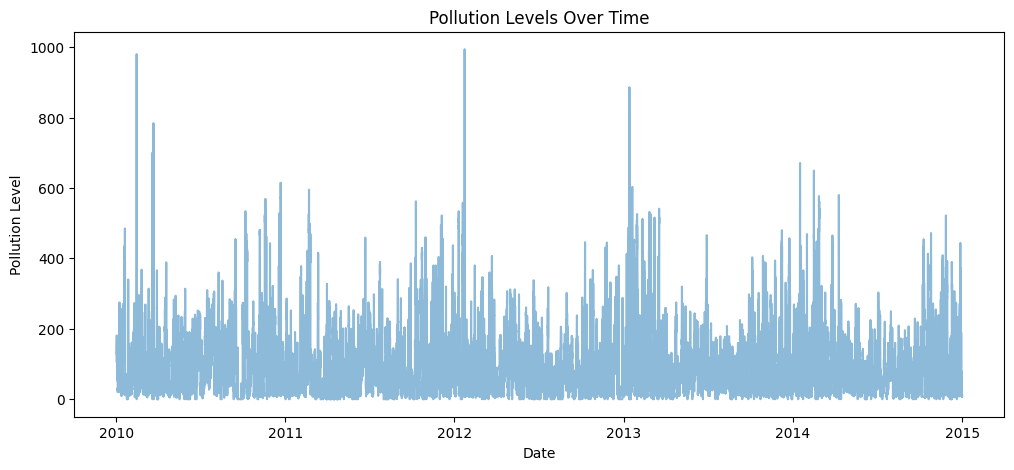

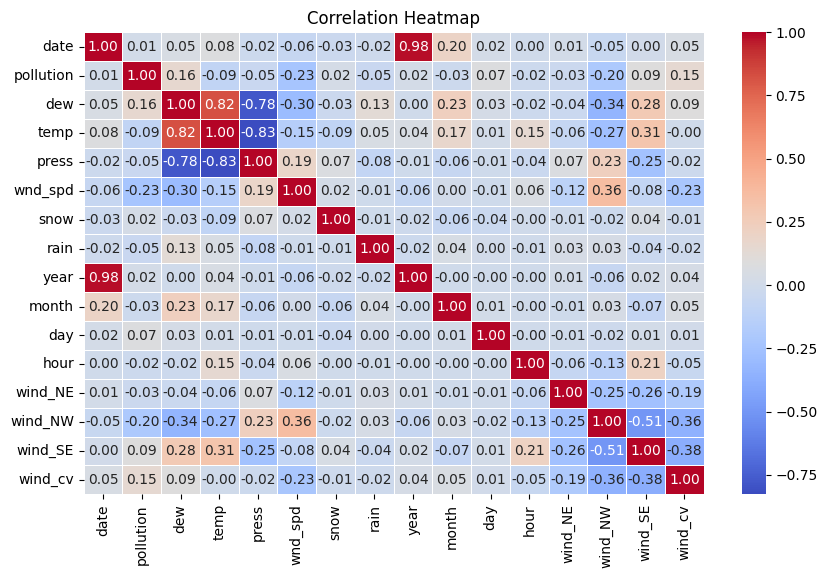

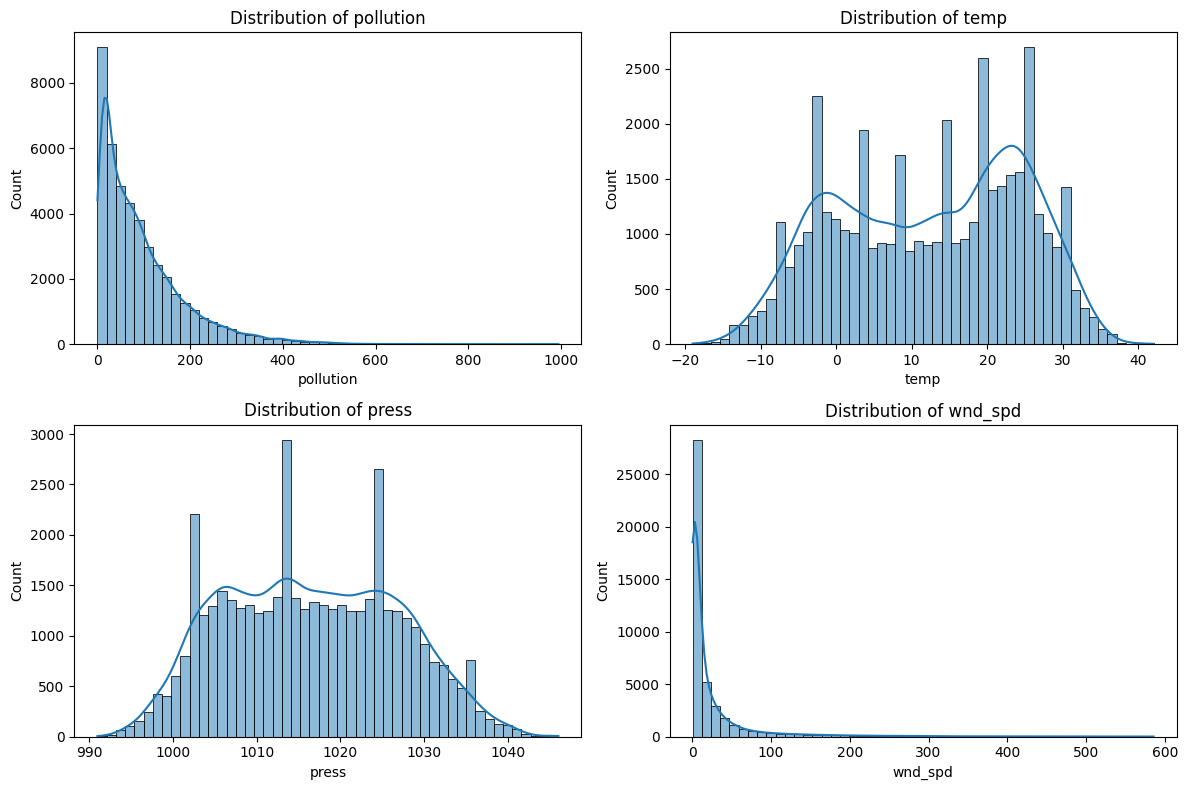

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Pollution.csv')

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract time-based features
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour

# Check for missing values
missing_values = df.isnull().sum()

# Visualizing pollution levels over time
sns.lineplot(x=df["date"], y=df["pollution"], alpha=0.5)

df = pd.get_dummies(df, columns=["wnd_dir"], prefix="wind")

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Distribution plots for key numerical features
num_features = ["pollution", "temp", "press", "wnd_spd"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True)

**Part 1**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - loss: 15153.9727 - mae: 83.3641 - val_loss: 13811.6602 - val_mae: 75.8143
Epoch 2/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 11394.4033 - mae: 70.0518 - val_loss: 11396.8848 - val_mae: 70.5181
Epoch 3/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - loss: 9531.5986 - mae: 67.1539 - val_loss: 10278.2344 - val_mae: 70.2045
Epoch 4/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - loss: 9026.0410 - mae: 67.8855 - val_loss: 9879.6641 - val_mae: 71.3234
Epoch 5/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - loss: 8939.3857 - mae: 69.5421 - val_loss: 9758.9619 - val_mae: 72.1701
Epoch 6/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 8737.1260 - mae: 69.7257 - val_loss: 9732.7900 - val_mae: 72.4653
Epoch 7/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - loss: 8623.3760 - mae: 69.7896 - val_loss: 9723.4775 - val_mae: 72.5915
Epoch 8/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - loss: 8895.2793 - mae: 70.5910 - val_loss: 

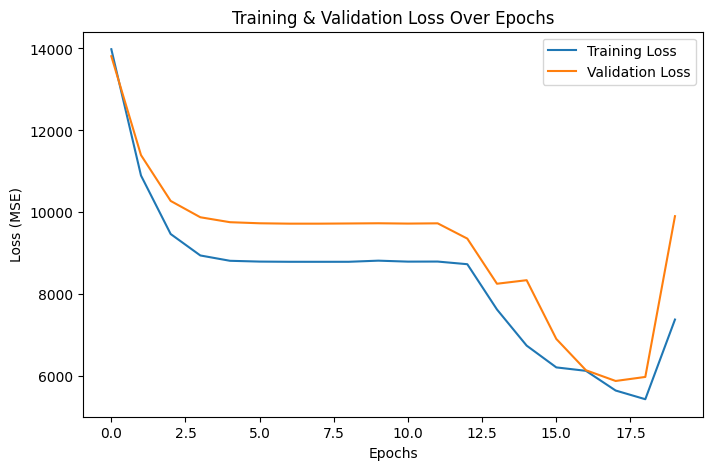

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = ["dew", "temp", "press", "wnd_spd", "snow", "rain"] + [col for col in df.columns if "wind_" in col]
target = "pollution"

# Scaling the features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Creating sequences for RNN input (using past 24 hours to predict the next hour)
seq_length = 24

def create_sequences(data, target_col, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i : i + seq_length][features].values)
        y.append(data.iloc[i + seq_length][target_col])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled, target, seq_length)

# Splitting into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Define LSTM Model
model = Sequential([
    LSTM(64, activation="tanh", return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(32, activation="tanh", return_sequences=False),
    Dropout(0.2),
    Dense(1, activation="linear")  # Linear activation for regression
])

# Compile Model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Plot Loss Function Over Epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")


**Part 2**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


958/958 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - loss: 14977.4395 - mae: 82.9516 - val_loss: 13918.6035 - val_mae: 76.1235
Epoch 2/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 11397.1387 - mae: 70.2719 - val_loss: 11428.7422 - val_mae: 70.5587
Epoch 3/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - loss: 9832.7393 - mae: 67.2748 - val_loss: 10293.0020 - val_mae: 70.1836
Epoch 4/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 8876.1377 - mae: 67.6180 - val_loss: 9877.2266 - val_mae: 71.3358
Epoch 5/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - loss: 9009.2588 - mae: 69.5576 - val_loss: 9761.4727 - val_mae: 72.1453
Epoch 6/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - loss: 8937.9111 - mae: 69.9833 - val_loss: 9737.3340 - val_mae: 72.4081
Epoch 7/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 8990.0947 - mae: 70.4063 - val_loss: 9728.7402 - val_mae: 72.5189
Epoch 8/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 8992.7109 - mae: 70.7528 - val_loss: 9725.4971 -

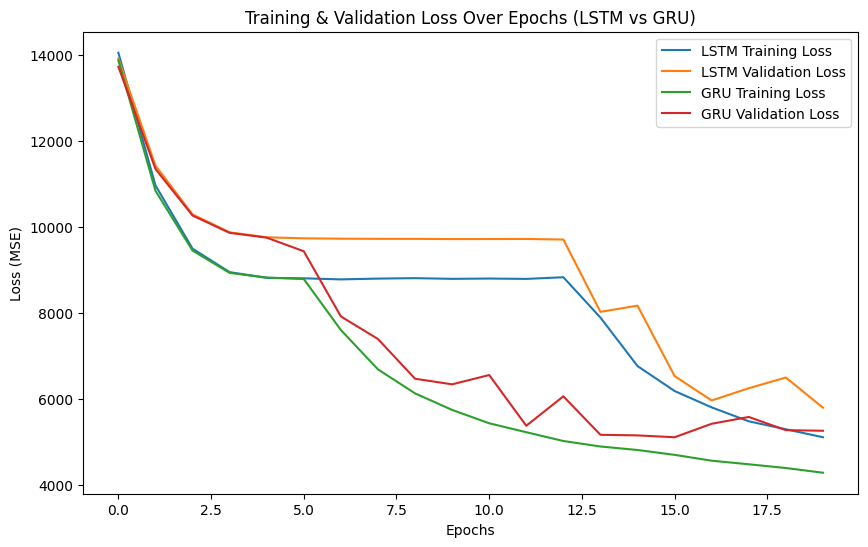

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


def build_lstm_model():
    model = Sequential([
        LSTM(64, activation="tanh", return_sequences=True, input_shape=(seq_length, len(features))),
        Dropout(0.2),
        LSTM(32, activation="tanh", return_sequences=False),
        Dropout(0.2),
        Dense(1, activation="linear")
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

def build_gru_model():
    model = Sequential([
        GRU(64, activation="tanh", return_sequences=True, input_shape=(seq_length, len(features))),
        Dropout(0.2),
        GRU(32, activation="tanh", return_sequences=False),
        Dropout(0.2),
        Dense(1, activation="linear")
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# Train LSTM Model
lstm_model = build_lstm_model()
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Train GRU Model
gru_model = build_gru_model()
gru_history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Plot Loss Function Over Epochs
plt.plot(lstm_history.history["loss"], label="LSTM Training Loss")
plt.plot(lstm_history.history["val_loss"], label="LSTM Validation Loss")
plt.plot(gru_history.history["loss"], label="GRU Training Loss")
plt.plot(gru_history.history["val_loss"], label="GRU Validation Loss")


Basic RNNs struggle with long-term dependencies due to the vanishing gradient problem. LSTMs address this by using cell states and multiple gates (input, forget, and output) to regulate information flow, allowing them to retain long-term dependencies. GRUs simplify this by using only two gates (reset and update), making them computationally more efficient. LSTMs are generally better for longer sequences, while GRUs train faster and can perform similarly on smaller datasets. The choice between them depends on the dataset size, sequence length, and computational constraints.

**Part 3**

A traditional feed-forward network can be used to solve this time-series forecasting problem, but there are significant limitations. Time series can be transformed into static features for an FNN by the sliding window approach (instead of feeding sequential data, we create fixed-length input vectors by the past N time steps as seperate features) and feature engineering (extracting statistical features and encoding time-based features.) However the lack of temporal dependencies, fixed input size and poor generalization are limitations for FFNs for time-series data

The following links were used to answer this question:

[link text](https://www.researchgate.net/publication/220668844_Feedforward_Neural_Nets_as_Models_for_Time_Series_Forecasting)

[link text](https://ieeexplore.ieee.org/document/6327793)

**Task 3**

**Part 1** Implementing Work Embeddings

For this part I will be used pretrained Word2Vec. I chose this embendding because it is computationally effecient compared to BERT. Word2vec embeddings are widely used and trained on large corpora. In addition, Word2Vec produces meaningful word vectors that capture semantic relationships.

[link text](https://www.tensorflow.org/text/tutorials/word2vec)

In [ ]:
import gensim.downloader as api

def load_word2vec():
    print("Loading Word2Vec model...")
    model = api.load("word2vec-google-news-300")  # Pre-trained Word2Vec model
    print("Model loaded successfully!")
    return model

def get_embedding(model, word):
    if word in model:
        return model[word]
    else:
        print(f"'{word}' is out of vocabulary (OOV). Attempting approximation...")
        similar_words = model.most_similar(word, topn=3) if word in model.key_to_index else []
        if similar_words:
            print(f"Suggested similar words: {[w[0] for w in similar_words]}")
            return model[similar_words[0][0]]  # Use the closest available word
        else:
            print("No close matches found. Returning zero vector.")
            return [0] * model.vector_size  # Return a zero vector

model = load_word2vec()

word1 = input("Enter first word: ").strip().lower()
word2 = input("Enter second word: ").strip().lower()

embedding1 = get_embedding(model, word1)
embedding2 = get_embedding(model, word2)

print(f"Embedding for '{word1}': {embedding1[:10]} ... (truncated)")
print(f"Embedding for '{word2}': {embedding2[:10]} ... (truncated)")



Loading Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!
Enter first word: Tree
Enter second word: square
Embedding for 'tree': [ 0.484375    0.12255859 -0.15722656  0.03466797 -0.21972656 -0.23535156
  0.11328125  0.02770996  0.1328125   0.28710938] ... (truncated)
Embedding for 'square': [-0.02331543 -0.07568359  0.36523438 -0.00442505  0.13574219 -0.08056641
 -0.09716797 -0.09960938 -0.1328125   0.09765625] ... (truncated)


**Part 2** Cosine Similarity Computation

Loading Word2Vec model...
Model loaded successfully!
Enter the number of word pairs: 4
Enter two words separated by space: tree square
Enter two words separated by space: nail screen
Enter two words separated by space: wallet charger
Enter two words separated by space: desk lamp
Cosine similarity between 'tree' and 'square': 0.1185
Cosine similarity between 'nail' and 'screen': 0.0796
Cosine similarity between 'wallet' and 'charger': 0.3152
Cosine similarity between 'desk' and 'lamp': 0.2141


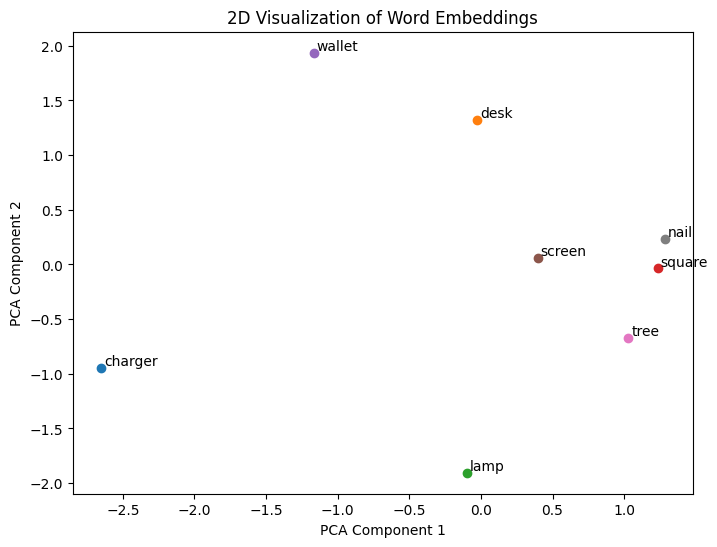

In [ ]:
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def batch_cosine_similarity(model, word_pairs):
    results = {}
    for word1, word2 in word_pairs:
        vec1, vec2 = get_embedding(model, word1), get_embedding(model, word2)
        similarity = cosine_similarity(vec1, vec2)
        results[(word1, word2)] = similarity
    return results

def visualize_embeddings(model, words):
    embeddings = np.array([get_embedding(model, word) for word in words])
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    for i, word in enumerate(words):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02, word)
    plt.show()

model = load_word2vec()

num_pairs = int(input("Enter the number of word pairs: "))
word_pairs = []
words = set()
for _ in range(num_pairs):
    word1, word2 = input("Enter two words separated by space: ")
    word_pairs.append((word1, word2))
    words.update([word1, word2])

similarities = batch_cosine_similarity(model, word_pairs)
for pair, similarity in similarities.items():
    print(f"Cosine similarity between '{pair[0]}' and '{pair[1]}': {similarity:.4f}")

visualize_embeddings(model, list(words))



Cosine similarity is useful in word embedding space beacuse it effectively measures the semantic similarity between words while being efficient. Cosine similarity measures direction and not magnitude thus it can focus on semantic relationships. In addition, it ensures that common words do not overshadow meaningful relationships.

**Part 3** Designing a Novel Dissimilarity Metric

Loading Word2Vec model...
Model loaded successfully!
Enter the number of word pairs: 4
Enter two words separated by space: tree square
Enter two words separated by space: nail screen
Enter two words separated by space: wallet charger
Enter two words separated by space: desk lamp
Choose metric (cosine/euclidean/custom): euclidean
Euclidean score between 'tree' and 'square': 3.9416
Euclidean score between 'nail' and 'screen': 3.9506
Euclidean score between 'wallet' and 'charger': 4.1953
Euclidean score between 'desk' and 'lamp': 4.0544


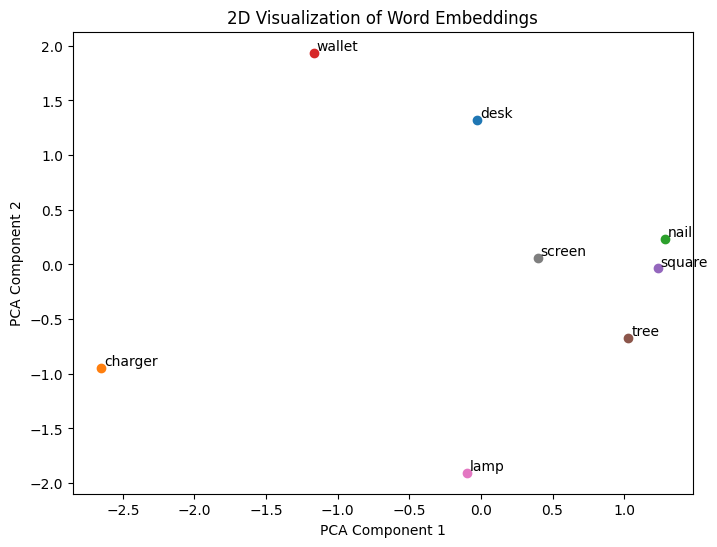

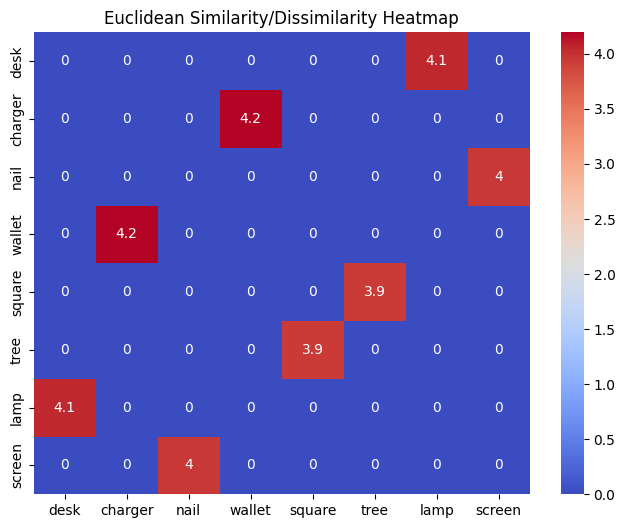

In [ ]:
import gensim.downloader as api
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def batch_similarity(model, word_pairs):
    results = {}
    for word1, word2 in word_pairs:
        vec1, vec2 = get_embedding(model, word1), get_embedding(model, word2)
        score = euclidean_distance(vec1, vec2)
        results[(word1, word2)] = score
    return results

def plot_heatmap(results):
    words = list(set([w for pair in results.keys() for w in pair]))
    matrix = np.zeros((len(words), len(words)))
    word_to_index = {word: i for i, word in enumerate(words)}

    for (word1, word2), value in results.items():
        i, j = word_to_index[word1], word_to_index[word2]
        matrix[i, j] = value
        matrix[j, i] = value

    sns.heatmap(matrix, xticklabels=words, yticklabels=words, annot=True, cmap="coolwarm")
    plt.show()


model = load_word2vec()

num_pairs = int(input("Enter the number of word pairs: "))
word_pairs = []
words = set()
for _ in range(num_pairs):
    word1, word2 = input("Enter two words separated by space: ")
    word_pairs.append((word1, word2))
    words.update([word1, word2])

similarities = batch_similarity(model, word_pairs)

for pair, score in similarities.items():
    print("Euclidean score between '{pair[0]}' and '{pair[1]}': {score:.4f}")

visualize_embeddings(model, list(words))
plot_heatmap(similarities)


Cosine similarity measures the angle between two word vectors but ignores magnitude, which can be limiting when assesin diversity in word embeddings. Eucledian distance on the other hand measures the absolute distance between word embeddings, incorporating both direction and magnitude. Words with similar meanings but different magnitudes (big and huge) might still be far apart in euclidean space thus cpaturing subtle differences. Euclidean distance also is able to differentiate between antonyms unlike cosine similarity which assigns high similarity to word pairs like (good and bad).

[link text](https://www.geeksforgeeks.org/when-to-use-cosine-similarity-over-euclidean-similarity/)